In [1]:
import glob
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn
import tensorflow as tf
model = tf.keras.models.load_model('saved_model/my_modelBB51')

# Check its architecture
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 1)                 2         
_________________________________________________________________
dense_8 (Dense)              (None, 64)                128       
_________________________________________________________________
dense_9 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_10 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_11 (Dense)             (None, 32)                544       
_________________________________________________________________
dense_12 (Dense)             (None, 64)                2112      
_________________________________________________________________
dense_13 (Dense)             (None, 1)                

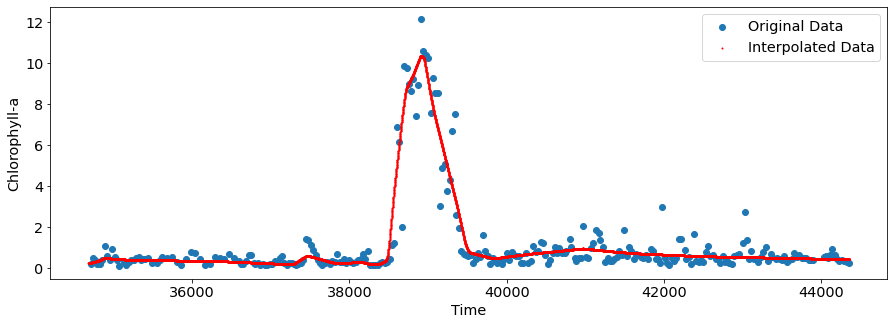

313/313 [==============================] - 0s 330us/step - loss: 1.5905e-16
['loss']


array([[0.02877634],
       [0.02480697],
       [0.02443279],
       [0.02423095],
       [0.02415879],
       [0.02408664],
       [0.02401331],
       [0.02394351],
       [0.02387023],
       [0.02359254],
       [0.02315483],
       [0.02267619],
       [0.02220093],
       [0.02183231],
       [0.02145121],
       [0.02097923],
       [0.02018359],
       [0.01933436],
       [0.01846721],
       [0.03173164],
       [0.03152814],
       [0.03131783]], dtype=float32)

In [2]:
df = pd.read_csv("C:/Users/yanzh/Desktop/chloro_data/BB51.csv")
time = df['time'].values
chlorophylla = df['chlorophylla'].values
df
#Transform the normalized scale to real scale
chlorophylla_min = 0.08
chlorophylla_max = 12.12
time_min = 34710.00   
time_max = 44356.42     

newtimepoints_scaled = np.linspace(time[0] - (time[1] - time[0]),time[-1], 10000)
y_predicted_scaled = model.predict(newtimepoints_scaled)

newtimepoints = newtimepoints_scaled*(time_max - time_min) + time_min
y_predicted = y_predicted_scaled*(chlorophylla_max - chlorophylla_min) + chlorophylla_min
# Display the result
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)
plt.scatter(time*(time_max - time_min) + time_min, chlorophylla*(chlorophylla_max - chlorophylla_min) + chlorophylla_min, label='Original Data')
plt.scatter(newtimepoints, y_predicted, c = 'red', s = 1, label = 'Interpolated Data')
plt.xlabel('Time')
plt.ylabel('Chlorophyll-a')
plt.legend()
plt.show()
model.evaluate(newtimepoints_scaled, y_predicted_scaled, batch_size=32)
print(model.metrics_names)
interpolation = model.predict([0.040740502
,0.078682038
,0.084798297
,0.097445476
,0.103769065
,0.110092655
,0.116519909
,0.122636168
,0.128959757
,0.135283347
,0.141606936
,0.147930525
,0.15435778
,0.160474039
,0.166797628
,0.173121218
,0.179444807
,0.185768396
,0.192195651
,0.95569132
,0.958801282
,0.96201491

])
interpolation